In [117]:
from IPython.display import HTML 
s="""<h1>2D Navier-Stokes for Flow in a Cavity (vs Ghia)</h1></br><div id="toc"></div>
<script src="https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js" defer></script>""";
h=HTML(s); h

***
# Understand the Problem

## Question

* What is the 2D velocity **and** pressure field for the **2D Navier Stokes Equation** for flow over a cavity?

## Initial Conditions

* The velocity and pressure fields are zero everywhere

## Boundary Conditions

Dimensionless form:

* The u-boundary condition at y=1 is 1 (the lid) 

* The other velocity boundary conditions are zero (no slip). 

* The p-boundary condition at y=1 is 0 (atmospheric pressure)

* The gradient of pressure at y=0, x=0 and x=1 is zero (Neumann)

* Density = 1

* Viscosity = 1/Re = 1/100

## Governing Equations

* The Navier Stokes Momentum Equation is described as follows:

$$ {\partial u \over \partial t} + u {\partial u \over \partial x} + v {\partial u \over \partial y} = -{1 \over \rho} {{\partial p} \over {\partial x}} + \nu \left ( {\partial^2 u \over \partial x^2}+  {\partial^2 u \over \partial y^2}  \right ) $$

$$ {\partial v \over \partial t} + u {\partial v \over \partial x} + v {\partial v \over \partial y} = -{1 \over \rho} {{\partial p} \over {\partial y}} + \nu \left ( {\partial^2 v \over \partial x^2}+  {\partial^2 v \over \partial y^2}  \right ) $$

* The Poisson Equation to link pressure and velocity is:

$$ \nabla^2 p^{n+1} = \rho {{\nabla \cdot \mathbf{u}^n} \over {\Delta t}}-
   \rho \nabla \cdot (\mathbf{u}^n \cdot \nabla \mathbf{u}^n)+
   \mu \nabla^2 (\nabla \cdot \mathbf{u}^n)
$$

* **Assuming viscosity is small**, the Poisson Equation to link pressure and velocity is as follows:

$$ {{\partial^2 p} \over {\partial x^2}} + {{\partial^2 p} \over {\partial y^2}} =
{\rho \over \Delta t} \left( {{\partial u} \over {\partial x}} + {{\partial v} \over {\partial y}} \right)
- \rho \left[ \left( {{\partial u} \over {\partial x}} \right)^2 + 
2 {{\partial u} \over {\partial y}} {{\partial v} \over {\partial x}} +
\left( {{\partial v} \over {\partial y}} \right)^2 \right] $$

(this equation applies in the discrete domain)

***

# Formulate the Problem

## Input Data:

The Poisson Equation has **no temporal component**, so we use a number of iterations `niter`

The Navier Stokes Momentum Equation **does have a temporal component**, so we use `nt`

* `niter` = 51 (maximum number of iterations - for Poisson Equation)
* `nt` = 51 (number of temporal points)
* `nx` = 129 (number of x spatial points)
* `ny` = 129 (number of y spatial points)
* `tmax` = 6
* `xmax` = 1
* `ymax` = 1
* `nu` = 1/100
* `rho` = 1

## Initial Conditions:

* $\forall (n, x, y) \quad n = 0 \rightarrow u = 0 \land v = 0 \land p = 0$

## Velocity Boundary Conditions:

* $\forall (n, x, y) \quad y = 1 \rightarrow u = 1$

* $\forall (n, x, y) \quad x = 0 \lor x = 1 \lor y = 0  \rightarrow u = 0$

* $\forall (n, x, y) \quad x = 0 \lor x = 1 \lor y = 0 \lor y = 1  \rightarrow v = 0$

## Pressure Boundary Conditions:

* $\forall (n, x, y) \quad y = 1 \rightarrow p = 0$

* $\forall (n, x, y) \quad y = 0 \rightarrow {{\partial p} \over {\partial y}} = 0$

* $\forall (n, x, y) \quad x = 0 \lor x = 1 \rightarrow {{\partial p} \over {\partial x}} = 0$

## Output Data:

* $\forall (n,x,y) \quad \ p = ? \land u = ? \land v = ?$

***

# Design Algorithm to Solve Problem

## Space-time discretisation:

* i $\rightarrow$ index of grid in x
* j $\rightarrow$ index of grid in y
* n $\rightarrow$ index of time
* m $\rightarrow$ index of iterations

## Numerical schemes for each Momentum Equation

* For the **one** first derivative of velocity in time: 1st order FD in time
* For the **two** first derivatives of velocity in space: 1st order BD in space
* For the **one** first derivative of pressure in space: 2nd order CD in space
* For the **two** second derivatives of velocity in space: 2nd order CD in space

## Numerical schemes for the Poisson Equation

* For the **two** second derivatives of pressure in space: 2nd order CD in space
* The the **four** first derivatives of velocity in space: 2nd order CD in space

## Discrete equation for u-Momentum Equation

$$ {{u_{i,j}^{n+1} - u_{i,j}^n} \over {\Delta t}} + 
   u_{i,j}^n {{u_{i,j}^n - u_{i-1,j}^n} \over \Delta x} + 
   v_{i,j}^n {{u_{i,j}^n - u_{i,j-1}^n} \over \Delta y} = \\
   -{1 \over \rho} {{p_{i+1,j}^n - p_{i-1,j}^n} \over {2 \Delta x}} +
   \nu {{u_{i-1,j}^n - 2u_{i,j}^n + u_{i+1,j}^n} \over \Delta x^2} + 
   \nu {{u_{i,j-1}^n - 2u_{i,j}^n + u_{i,j+1}^n} \over \Delta y^2}
$$

## Transpose

Assume $ \Delta x = \Delta y = h$

$$ u_{i,j}^{n+1} = u_{i,j}^n - {{\Delta t} \over h} \left[ u_{i,j}^n(u_{i,j}^n - u_{i-1,j}^n) + v_{i,j}^n(u_{i,j}^n - u_{i,j-1}^n)\right] - \\
{{\Delta t} \over {2 \rho h}} (p_{i+1,j}^n - p_{i-1,j}^n) + {{\Delta t \nu} \over {h^2}}
(u_{i-1,j}^n + u_{i+1,j}^n + u_{i,j-1}^n + u_{i,j+1}^n - 4 u_{i,j}^n )
$$

## Discrete equation for v-Momentum Equation

$$ {{v_{i,j}^{n+1} - v_{i,j}^n} \over {\Delta t}} + 
   u_{i,j}^n {{v_{i,j}^n - v_{i-1,j}^n} \over \Delta x} + 
   v_{i,j}^n {{v_{i,j}^n - v_{i,j-1}^n} \over \Delta y} = \\
   -{1 \over \rho} {{p_{i,j+1}^n - p_{i,j-1}^n} \over {2 \Delta y}} +
   \nu {{v_{i-1,j}^n - 2v_{i,j}^n + v_{i+1,j}^n} \over \Delta x^2} + 
   \nu {{v_{i,j-1}^n - 2v_{i,j}^n + v_{i,j+1}^n} \over \Delta y^2}
$$

## Transpose

Assume $ \Delta x = \Delta y = h$

$$ v_{i,j}^{n+1} = v_{i,j}^n - {{\Delta t} \over h} \left[ u_{i,j}^n(v_{i,j}^n - v_{i-1,j}^n) + v_{i,j}^n(v_{i,j}^n - v_{i,j-1}^n)\right] - \\
{{\Delta t} \over {2 \rho h}} (p_{i,j+1}^n - p_{i,j-1}^n) + {{\Delta t \nu} \over {h^2}}
(v_{i-1,j}^n + v_{i+1,j}^n + v_{i,j-1}^n + v_{i,j+1}^n - 4 v_{i,j}^n )
$$

## Discrete equation for Poisson Equation must be Divergence Free

Since no terms have a differential temporal component - bring source term to other side and equate to forward differencing (as we did for Laplace Equation). Then take steady state after a certain number of iterations.

$$ {{\partial p} \over {\partial t}} = {\partial^2 p \over \partial x^2} + {\partial^2 p \over \partial y^2} - 
\left[ {\rho \over \Delta t} \left( {{\partial u} \over {\partial x}} + {{\partial v} \over {\partial y}} \right)
- \rho \left[ \left( {{\partial u} \over {\partial x}} \right)^2 + 
2 {{\partial u} \over {\partial y}} {{\partial v} \over {\partial x}} +
\left( {{\partial v} \over {\partial y}} \right)^2 \right] \right] $$

$$ {{\partial p} \over {\partial t}} = {\partial^2 p \over \partial x^2} + {\partial^2 p \over \partial y^2} - 
b $$

$$ {{p_{i,j}^{m+1}-p_{i,j}^m} \over {\Delta \tau}} = {{p_{i+1,j}^m -2p_{i,j}^m + p_{i-1,j}^m} \over \Delta x^2} + {{p_{i,j+1}^m -2p_{i,j}^m + p_{i,j-1}^m} \over \Delta y^2} - b_{i,j}^m $$

Assume that $ \Delta x = \Delta y = h $

$$ {{p_{i,j}^{m+1}-p_{i,j}^m} \over {\Delta \tau}} = {{p_{i+1,j}^m -2p_{i,j}^m + p_{i-1,j}^m} \over h^2} + {{p_{i,j+1}^m -2p_{i,j}^m + p_{i,j-1}^m} \over h^2} - b_{i,j}^m $$


$$ p_{i,j}^{m+1} = p_{i,j}^m + {{\Delta \tau} \over {h^2}} \left( 
p_{i+1,j}^m + p_{i-1,j}^m + p_{i,j+1}^m + p_{i,j-1}^m - 4p_{i,j}^m \right) - b_{i,j}^m \Delta \tau $$

For the fastest convergence $ r = {{\Delta \tau} \over {h^2}} = {1 \over 4} $ and $ \Delta \tau = {{h^2} \over 4} $

Hence:

$$ p_{i,j}^{m+1} = {1 \over 4} \left( p_{i+1,j}^m + p_{i-1,j}^m + p_{i,j+1}^m + p_{i,j-1}^m - b_{i,j}^m h^2 \right) $$

So now we need to define $ b_{i,j}^m $

$$
b = {\rho \over \Delta t} \left( {{\partial u} \over {\partial x}} + {{\partial v} \over {\partial y}} \right)
- \rho \left[ \left( {{\partial u} \over {\partial x}} \right)^2 + 
2 {{\partial u} \over {\partial y}} {{\partial v} \over {\partial x}} +
\left( {{\partial v} \over {\partial y}} \right)^2 \right] 
$$



$$ b_{i,j}^{m} = 
{\rho \over \Delta t} \left( {{u_{i+1,j}^n - u_{i-1,j}^n} \over {2 \Delta x}} + {{v_{i,j+1}^n - v_{i,j-1}^n} \over {2 \Delta y}} \right) -
\rho \left[ \left( {{u_{i+1,j}^n - u_{i-1,j}^n} \over {2 \Delta x}} \right)^2 + 2 \left( {{u_{i,j+1}^n - u_{i,j-1}^n} \over {2 \Delta y}} {{v_{i+1,j}^n - v_{i-1,j}^n} \over {2 \Delta x}}\right) +
\left( {{v_{i,j+1}^n - v_{i,j-1}^n} \over {2 \Delta y}} \right)^2 \right] $$

Also assume that $ \Delta x = \Delta y = h $


$$ b_{i,j}^{m} = 
{\rho \over {2 h \Delta t}} ( {{u_{i+1,j}^n - u_{i-1,j}^n}} + {{v_{i,j+1}^n - v_{i,j-1}^n}} ) -
{\rho \over {4h^2}} \left[ (u_{i+1,j}^n - u_{i-1,j}^n)^2 + 2 ( u_{i,j+1}^n - u_{i,j-1}^n) (v_{i+1,j}^n - v_{i-1,j}^n) + (v_{i,j+1}^n - v_{i,j-1}^n)^2 \right] $$

## Navier Stokes Equations - slice notation

In [3]:
def navier_stokes_initialisation(niter, r, nx_or_ny, tmax, xmax_or_ymax):
    """
    Returns the velocity field and distance for 2D linear convection
    """
    # Increments:
    nx = ny = nx_or_ny
    xmax = ymax = xmax_or_ymax
    dx = xmax/(nx-1)
    dy = ymax/(ny-1)
    nt = int((tmax / (r*(dx)**2))+1)
    dt = tmax/(nt-1)
    
    # Initialise data structures:
    import numpy as np
    p = np.zeros((nx,ny))
    u = np.zeros((nx,ny))
    v = np.zeros((nx,ny))
    
    # linspace is SIMPLER than list comprehensions:
    x = np.linspace(0.0,1.0,nx)
    y = np.linspace(0.0,1.0,ny)
    
    # Pressure Boundary Conditions:
    p[:, ny-1] = 0.0
    
    # Velocity Boundary Conditions:
    u[:,ny-1] = 1.0
        
    return p, x, y, u, v, nx, ny, nt, dx, dy, dt, niter, r

In [74]:
def navier_stokes(rho, nu, niter, r, nx, tmax, xmax):
                  
    (p, x, y, u, v, nx, ny, nt, 
    dx, dy, dt, niter, r) = navier_stokes_initialisation(niter, r, nx, tmax, xmax)
    
    # Increments
    h = dx
    error_target = 1.0e-2
    import numpy as np
    
    # Intermediate copies:
    un = np.zeros((nx, ny))
    vn = np.zeros((nx, ny))
    pm = np.zeros((nx, ny))
    bm = np.zeros((nx, ny)) # bm needs to be exactly zero at the boundaries
        
    # Loop - use decimal points for all floating point numbers
    for n in range(nt):    
        
        # We know the velocity at i=0, j=0, i=nx-1 and j=ny-1. b is zero at the boundaries.  
        bm[1:-1, 1:-1] = ( (rho / (2.0 * h * dt)) * ( u[2:, 1:-1] - u[0:-2, 1:-1] 
                                                    + v[1:-1, 2:] - v[1:-1, 0:-2] ) -
            (rho / (4.0*h**2)) * ( (u[2:, 1:-1] - u[0:-2, 1:-1])**2.0 + 
                             2.0*(u[1:-1, 2:] - u[1:-1, 0:-2])*(v[2:, 1:-1] - v[0:-2, 1:-1]) + 
                                   (v[1:-1, 2:] - v[1:-1, 0:-2])**2.0 ) )
        
        # First points for p. We don't know the pressure at i=0, j=0 and i=nx-1. We DO know the pressure at j=ny-1
    
        while True: 
            for m in range(niter):
                pm = np.copy(p)
                p[1:-1, 1:-1] = 0.25*( pm[2:, 1:-1] + pm[0:-2, 1:-1] + pm[1:-1, 2:] + pm[1:-1, 0:-2]
                                 - bm[1:-1, 1:-1]*h**2.0 )
            
                # Set zero gradient boundary conditions:
                p[0, :] = p[1, :]
                p[:, 0] = p[:, 1]
                p[-1, :] = p[-2, :]
            
                error = np.abs(np.sum(np.abs(p[1:-1, 1:-1])-np.abs(pm[1:-1, 1:-1])))
        
                if(error < error_target):
                    #print "n = " + str(m) + " completed"
                    break
            break
            
        # First points for u and v. We know the velocity at i=0, j=0, i=nx-1 and j=ny-1.
        # We are simply using the value of pressure here
        un = np.copy(u)
        vn = np.copy(v)
              
        u[1:-1, 1:-1] = ( un[1:-1, 1:-1] - 
                 (dt / h) * ( un[1:-1, 1:-1] * ( un[1:-1, 1:-1] - un[0:-2, 1:-1] ) + 
                              vn[1:-1, 1:-1] * ( un[1:-1, 1:-1] - un[1:-1, 0:-2] ) ) - 
        (dt / (2.0 * rho * h)) * ( p[2:, 1:-1] - p[0:-2, 1:-1] ) + 
        (dt * nu / h**2.0) * ( un[0:-2, 1:-1] + un[2:, 1:-1] + un[1:-1, 0:-2] + un[1:-1, 2:] - 
                         4.0 * un[1:-1, 1:-1] ) ) 

        v[1:-1, 1:-1] = ( vn[1:-1, 1:-1] - 
                 (dt / h) * ( un[1:-1, 1:-1] * ( vn[1:-1, 1:-1] - vn[0:-2, 1:-1] ) + 
                              vn[1:-1, 1:-1] * ( vn[1:-1, 1:-1] - vn[1:-1, 0:-2] ) ) - 
        (dt / (2.0 * rho * h)) * ( p[1:-1, 2:] - p[1:-1, 0:-2] ) + 
        (dt * nu / h**2.0) * ( vn[0:-2, 1:-1] + vn[2:, 1:-1] + vn[1:-1, 0:-2] + vn[1:-1, 2:] -
                         4.0 * vn[1:-1, 1:-1] ) )          
    
    return u, v, p, x, y

In [75]:
%timeit navier_stokes(1, 0.01, 50, 0.5, 51, 0.5, 1.0)

1 loops, best of 3: 1.25 s per loop


In [76]:
u00, v00, p00, x00, y00 = navier_stokes(1, 0.01, 50, 0.5, 51, 0.5, 1.0)

In [77]:
u01, v01, p01, x01, y01 = navier_stokes(1, 0.01, 50, 0.5, 51, 1.0, 1.0)

In [78]:
u02, v02, p02, x02, y02 = navier_stokes(1, 0.01, 50, 0.5, 51, 1.5, 1.0)

In [79]:
u03, v03, p03, x03, y03 = navier_stokes(1, 0.01, 50, 0.5, 51, 2.0, 1.0)

In [80]:
u04, v04, p04, x04, y04 = navier_stokes(1, 0.01, 50, 0.5, 51, 2.5, 1.0)

In [81]:
u05, v05, p05, x05, y05 = navier_stokes(1, 0.01, 50, 0.5, 51, 3.0, 1.0)

In [82]:
u06, v06, p06, x06, y06 = navier_stokes(1, 0.01, 50, 0.5, 51, 3.5, 1.0)

In [83]:
u07, v07, p07, x07, y07 = navier_stokes(1, 0.01, 50, 0.5, 51, 4.0, 1.0)

In [84]:
u08, v08, p08, x08, y08 = navier_stokes(1, 0.01, 50, 0.5, 51, 4.5, 1.0)

In [85]:
u09, v09, p09, x09, y09 = navier_stokes(1, 0.01, 50, 0.5, 51, 5.0, 1.0)

In [86]:
u010, v010, p010, x010, y010 = navier_stokes(1, 0.01, 50, 0.5, 51, 5.5, 1.0)

In [87]:
u011, v011, p011, x011, y011 = navier_stokes(1, 0.01, 50, 0.5, 51, 6.0, 1.0)

In [88]:
u012, v012, p012, x012, y012 = navier_stokes(1, 0.01, 50, 0.5, 51, 6.5, 1.0)

In [89]:
u013, v013, p013, x013, y013 = navier_stokes(1, 0.01, 50, 0.5, 51, 7.0, 1.0)

In [90]:
u014, v014, p014, x014, y014 = navier_stokes(1, 0.01, 50, 0.5, 51, 7.5, 1.0)

In [91]:
def vector_contour(u, v, p, x, y):
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    import numpy as np
    fig = plt.figure(figsize=(11,7), dpi=100)
    Y,X=np.meshgrid(y,x) #note meshgrid uses y,x not x,y!!!
    plt.contourf(X,Y,p[:,:],alpha=0.5)    ###plotting the pressure field as a contour
    plt.colorbar()
    plt.contour(X,Y,p[:,:])               ###plotting the pressure field outlines
    plt.quiver(X[::2,::2],Y[::2,::2],u[::2,::2],v[::2,::2]) ##plotting velocity
    plt.xlabel('X')
    plt.ylabel('Y')

# Results

## 51 spatial intervals tmax = 0.5 seconds

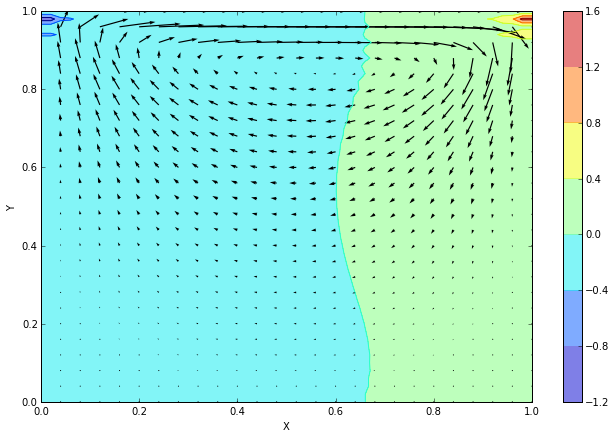

In [92]:
%matplotlib inline
vector_contour(u00, v00, p00, x00, y00)

## 51 spatial intervals tmax = 7.5 seconds

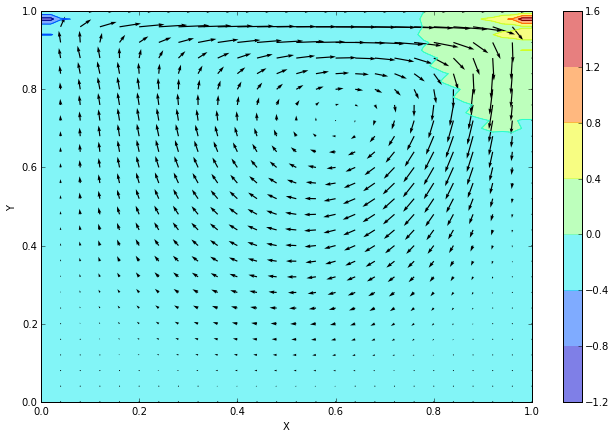

In [98]:
%matplotlib inline
vector_contour(u014, v014, p014, x014, y014)

## How much time needs to pass before the open cavity flow settles down to a steady state?

In [93]:
def plot_u_vs_y_2(u0, u1, u2, u3, u4, u5, u6, u7, u8, u9, u10, u11, u12, u13, u14, y0):

   """
   Plots the 1D velocity field
   """
   import numpy as np
   import matplotlib.pyplot as plt
   import matplotlib.cm as cm
   u_vel = np.zeros((51,15))
   u_vel[:, 0] = u0[25, :]
   u_vel[:, 1] = u1[25, :]
   u_vel[:, 2] = u2[25, :]
   u_vel[:, 3] = u3[25, :]
   u_vel[:, 4] = u4[25, :]
   u_vel[:, 5] = u5[25, :] 
   u_vel[:, 6] = u6[25, :] 
   u_vel[:, 7] = u7[25, :]
   u_vel[:, 8] = u8[25, :]
   u_vel[:, 9] = u9[25, :]
   u_vel[:, 10] = u10[25, :]
   u_vel[:, 11] = u11[25, :]
   u_vel[:, 12] = u12[25, :]
   u_vel[:, 13] = u13[25, :]
   u_vel[:, 14] = u14[25, :]

   ghia_y = [0.0000, 0.0547, 0.0625, 0.0703, 0.1016, 0.1716, 0.2813, 0.4531, 0.5000, 
          0.6172, 0.7344, 0.8516, 0.9531, 0.9609, 0.9688, 0.9766, 1.0000]
   ghia_u = [0.0000, -0.03717, -0.04192, -0.04775, -0.06434, -0.10150, -0.15662, -0.21090, 
         -0.20581, -0.13641, 0.00332, 0.23151, 0.68717, 0.73722, 0.78871, 0.84123, 1.0000]
    
   plt.figure()
   ax=plt.subplot(111)
   colour=iter(cm.rainbow(np.linspace(0, 1, 15)))
   for n in range(15):
       c=next(colour)
       ax.plot(y0,u_vel[:, n],linestyle='-',c=c, label='t= '+str(0.5*n+0.5)+ ' sec')
   ax.plot(ghia_y, ghia_u, linestyle='none', marker='x', c='k', label='ghia')
   box=ax.get_position()
   ax.set_position([box.x0, box.y0, box.width*2,box.height*2])
   ax.legend( bbox_to_anchor=(1.0,1.0), loc=2)
   plt.xlabel('y/L (-)')
   plt.ylabel('u/U (-)')
   plt.show()    

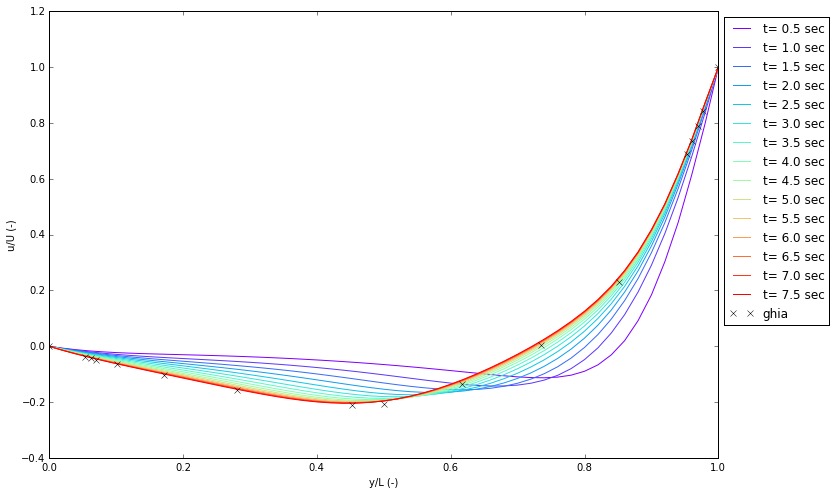

In [94]:
plot_u_vs_y_2(u00, u01, u02, u03, u04, u05, u06, u07, u08, u09, u010, u011, u012, u013, u014, y00)

In [95]:
def plot_v_vs_x(v0, v1, v2, v3, v4, v5, v6, v7, v8, v9, v10, v11, v12, v13, v14, x0):

   """
   Plots the 1D velocity field
   """
   import numpy as np
   import matplotlib.pyplot as plt
   import matplotlib.cm as cm
   v_vel = np.zeros((51,15))
   v_vel[:, 0] = v0[:, 25]
   v_vel[:, 1] = v1[:, 25]
   v_vel[:, 2] = v2[:, 25]
   v_vel[:, 3] = v3[:, 25]
   v_vel[:, 4] = v4[:, 25]
   v_vel[:, 5] = v5[:, 25] 
   v_vel[:, 6] = v6[:, 25] 
   v_vel[:, 7] = v7[:, 25] 
   v_vel[:, 8] = v8[:, 25] 
   v_vel[:, 9] = v9[:, 25] 
   v_vel[:, 10] = v10[:, 25] 
   v_vel[:, 11] = v11[:, 25] 
   v_vel[:, 12] = v12[:, 25] 
   v_vel[:, 13] = v13[:, 25] 
   v_vel[:, 14] = v14[:, 25] 
    
   ghia_x = [0.0000, 0.0625, 0.0703, 0.0781, 0.0938, 0.1563, 0.2266, 0.2344, 0.5000,
          0.8047, 0.8594, 0.9063, 0.9453, 0.9531, 0.9609, 0.9688, 1.0000]
   ghia_v = [0.0000, 0.09233, 0.10091, 0.10890, 0.12317, 0.16077, 0.17507, 0.17527, 0.05454,
          -0.24533, -0.22445, -0.16914, -0.10313, -0.08864, -0.07391, -0.05906, 0.0000]
   plt.figure()
   ax=plt.subplot(111)
   colour=iter(cm.rainbow(np.linspace(0, 1, 15)))
   for n in range(15):
       c=next(colour)
       ax.plot(x0,v_vel[:, n],linestyle='-',c=c, label='t= '+str(0.5*n+0.5)+ ' sec')
   ax.plot(ghia_x, ghia_v, linestyle='none', c='k', marker='x', label='ghia')
   box=ax.get_position()
   ax.set_position([box.x0, box.y0, box.width*2,box.height*2])
   ax.legend( bbox_to_anchor=(1.0,1.0), loc=2)
   plt.xlabel('x/L (-)')
   plt.ylabel('v/U (-)')
   plt.show()   

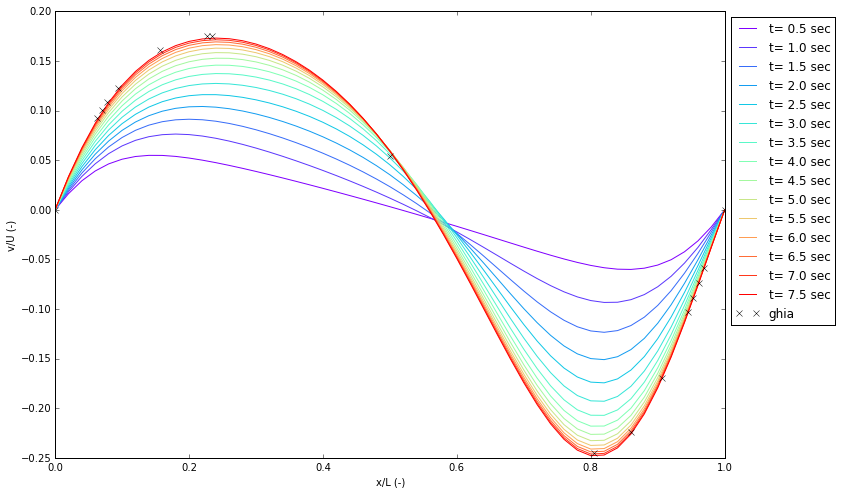

In [96]:
plot_v_vs_x(v00, v01, v02, v03, v04, v05, v06, v07, v08, v09, v010, v011, v012, v013, v014, x00)

Around 7.5 seconds